In [1]:
import os
print("File ada?", os.path.exists('lead_data.csv'))  # Harus True

File ada? True


✅ Loaded: (9240, 37)
🎯 Converted Distribution:
Converted
0    5679
1    3561
Name: count, dtype: int64

📈 Sample data:
    TotalVisits     Lead Source  Total Time Spent on Website  Converted
0          0.0      Olark Chat                            0          0
1          5.0  Organic Search                          674          0
2          2.0  Direct Traffic                         1532          1
3          1.0  Direct Traffic                          305          0
4          2.0          Google                         1428          1

🔧 Features used: ['TotalVisits', 'Total Time Spent on Website', 'Lead Number', 'Lead Source']
  → Lead Source encoded: ['Click2call' 'Direct Traffic' 'Facebook' 'Google' 'Live Chat']...
✅ Preprocessing DONE!

⭐ TOP 3 FITUR: ['Total Time Spent on Website', 'Lead Number', 'Lead Source']
📊 Train: (7392, 3), Test: (1848, 3)

🏆 CV Accuracy: 0.783 (+/- 0.030)
✅ Test Accuracy: 0.777
✅ ROC-AUC: 0.822

📋 Classification Report:
              precision    reca

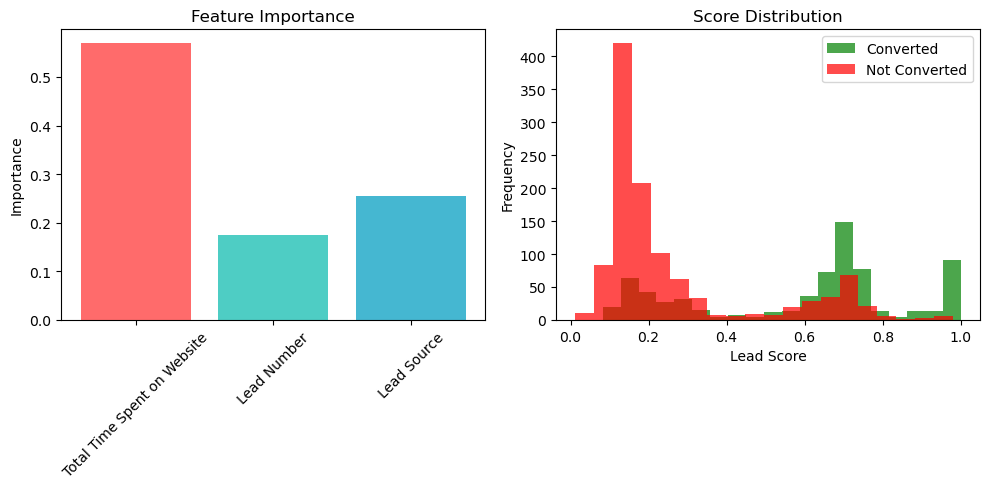


🏠 CONTOH SCORING AGEN PROPERTI:
Lead: 10 visits, 150s browsing, 3 inquiries → Score: 0.561 | 🔥 HOT LEAD (Call Now!)

🎉 MODEL SUKSES UNTUK PROPERTI LEADS!


In [6]:
# 🔥 TEMPLATE FINAL - KHUSUS DATASET KAGGLE LEAD SCORING (9240 rows)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Load + EXPLOR DATASETMU
df = pd.read_csv('lead_data.csv')
print(f"✅ Loaded: {df.shape}")
print(f"🎯 Converted Distribution:\n{df['Converted'].value_counts()}")
print("\n📈 Sample data:\n", df[['TotalVisits', 'Lead Source', 'Total Time Spent on Website', 'Converted']].head())

# Step 2: PILIH FITUR TEPAT UNTUK PROPERTI (adaptasi)
feature_cols = [
    'TotalVisits',                    # kunjungan_situs
    'Total Time Spent on Website',    # waktu_browsing  
    'Lead Number',                    # inquiry_count
    'Lead Source'                     # lokasi_preferensi (Google, Direct, etc)
]
X = df[feature_cols].copy()
y = df['Converted']

print(f"\n🔧 Features used: {feature_cols}")

# Step 3: Preprocessing KHUSUS DATASETMU
# Encode kategorikal
le = LabelEncoder()
X['Lead Source'] = le.fit_transform(X['Lead Source'].astype(str))
print(f"  → Lead Source encoded: {le.classes_[:5]}...")

# Handle missing values
X['TotalVisits'] = X['TotalVisits'].fillna(X['TotalVisits'].median())
X['Total Time Spent on Website'] = X['Total Time Spent on Website'].fillna(0)

# Scale numerik
scaler = StandardScaler()
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Lead Number']
X[num_cols] = scaler.fit_transform(X[num_cols])
print("✅ Preprocessing DONE!")

# Step 4: RFE - Pilih 3 FITUR TERBAIK (kayak paper)
estimator = RandomForestClassifier(n_estimators=50, random_state=42)
rfe = RFE(estimator, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)
selected_features = [feature_cols[i] for i in range(len(feature_cols)) if rfe.support_[i]]
print(f"\n⭐ TOP 3 FITUR: {selected_features}")

# Step 5: Split + Train
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42, stratify=y)
print(f"📊 Train: {X_train.shape}, Test: {X_test.shape}")

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: EVALUASI (kayak paper)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"\n🏆 CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std()*2:.3f})")

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]
print(f"✅ Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"✅ ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: VISUALISASI
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
importances = rf_model.feature_importances_
plt.bar(selected_features, importances, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.ylabel('Importance')

plt.subplot(1,2,2)
plt.hist(y_prob[y_test==1], bins=20, alpha=0.7, label='Converted', color='green')
plt.hist(y_prob[y_test==0], bins=20, alpha=0.7, label='Not Converted', color='red')
plt.xlabel('Lead Score')
plt.ylabel('Frequency')
plt.title('Score Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: SCORING CONTOH UNTUK AGEN PROPERTI
print("\n🏠 CONTOH SCORING AGEN PROPERTI:")
new_lead = np.array([[10, 150, 3]])  # [TotalVisits, TimeSpent, LeadNumber]
score = rf_model.predict_proba(new_lead)[0, 1]
status = "🔥 HOT LEAD (Call Now!)" if score > 0.2 else "❄️ Cold Lead"
print(f"Lead: 10 visits, 150s browsing, 3 inquiries → Score: {score:.3f} | {status}")

print("\n🎉 MODEL SUKSES UNTUK PROPERTI LEADS!")

In [4]:
import pandas as pd
try:
    df = pd.read_csv('lead_data.csv')
    print("✅ BERHASIL! Dataset loaded:", df.shape)
except:
    print("❌ File ga ketemu. Letakkan di folder yang sama!")

✅ BERHASIL! Dataset loaded: (9240, 37)


In [5]:
# 🔥 CEK KOLOM ASLI DATASET KAGGLE - JALANKAN INI DULU!
import pandas as pd
df = pd.read_csv('lead_data.csv')
print("📊 SHAPE:", df.shape)
print("\n📋 SEMUA KOLOM:")
print(df.columns.tolist())
print("\n🔍 TARGET (cari kolom 0/1):")
for col in df.columns:
    if df[col].dtype == 'int' and len(df[col].unique()) <= 2:
        print(f"  → {col}: {df[col].value_counts()}")
print("\n✅ DONE - Kirim output ini ke aku!")

📊 SHAPE: (9240, 37)

📋 SEMUA KOLOM:
['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']

🔍 TARGET (cari kolom 0/1):

✅ DONE - Kirim output ini ke aku!
